# **Function Transformer**
FunctionTransformer is a class in scikit-learn that allows you to apply a custom transformation function to your data as part of a scikit-learn pipeline. It is particularly useful when you have a transformation that is not available as a built-in preprocessing step in scikit-learn, and you want to incorporate it into your machine learning workflow.

Here are some key points about FunctionTransformer:

* **Custom Transformation:**<br> FunctionTransformer is used to apply a custom-defined function to transform your data. This function can be any valid Python function that takes an input array-like or pandas DataFrame and returns a transformed version of the data.

* **Seamless Integration:**<br> You can use FunctionTransformer seamlessly within a scikit-learn pipeline, which allows you to create a sequence of data processing and modeling steps. This is helpful for ensuring that your custom transformation is applied consistently to both training and testing data.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [2]:
df = pd.read_csv(r"D:\Coding\Datasets\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Selct only 'Age', 'Fare' and 'Survived' columns
df = df[["Survived", "Age", 'Fare']]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
# Check the column information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


## **Data Preprocessing**

In [5]:
# Fill the null values of the 'Age' column
df["Age"].fillna(df["Age"].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


## **Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1),
                                                    df['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((623, 2), (268, 2))

In [7]:
x_train.head()

,Age,Fare
857,51.000000,26.5500
52,49.000000,76.7292
386,1.000000,46.9000
124,54.000000,77.2875
578,29.699118,14.4583


## **Data Visualization**

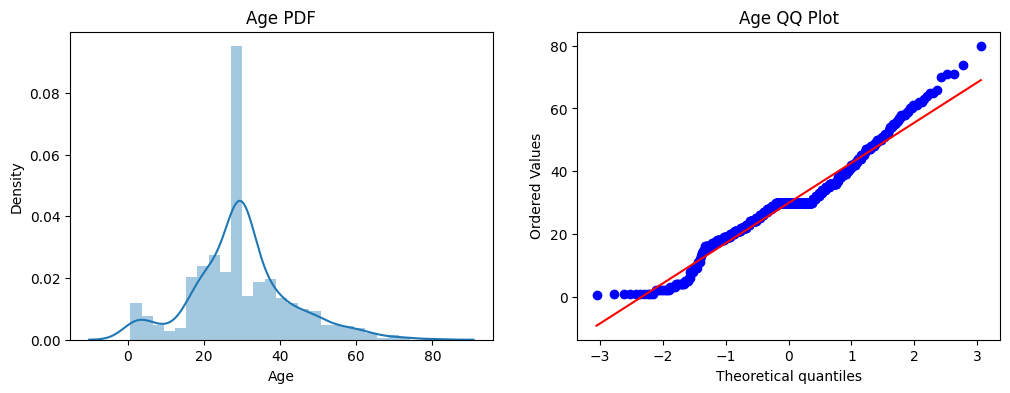

In [8]:
# Plot the distribution of the 'Age' column
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.distplot(x_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(x_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

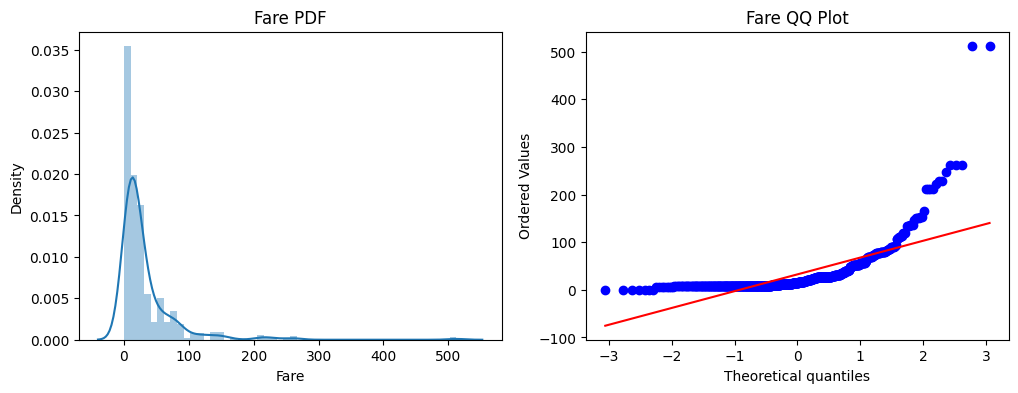

In [9]:
# Plot the distribution of the 'Fare' column
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.distplot(x_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(x_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.show()

## **Train a Classifier**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Create object of two different models
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

In [12]:
# Fit the training data to Logistic Regression model
lr_clf.fit(x_train, y_train)

LogisticRegression()

In [13]:
# Fit the training data to Decision Tree model
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
# Predict the test data
y_pred_lr = lr_clf.predict(x_test)
y_pred_dt = dt_clf.predict(x_test)

## **Assess the Accuracy**

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print("Accuarcy Score of LR Model:", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score of DT Model:", accuracy_score(y_test, y_pred_dt))

Accuarcy Score of LR Model: 0.6865671641791045
Accuracy Score of DT Model: 0.6716417910447762


## **Apply Transformation**
**Log Transformation:**<br>
Log transformation is a common data preprocessing technique used in various fields such as statistics, data analysis, and machine learning. It involves taking the logarithm of a dataset, typically the natural logarithm (base e) or the base 10 logarithm, to reduce the variation between data points and make the data more suitable for certain analyses or modeling techniques. Log transformation is particularly useful when dealing with data that exhibits exponential or multiplicative growth.

In [17]:
from sklearn.preprocessing import FunctionTransformer

In [18]:
# Apply log transformation on 'Fare' column because the PDF is positively/right skewed

# Create an object of FunctionTransformer
log_tranformer = FunctionTransformer(func=np.log1p)
                               
# Fit and transform the 'Fare' column of the training data
x_train_fare = log_tranformer.fit_transform(x_train[["Fare"]])

# Transform the test data
x_test_fare = log_tranformer.transform(x_test[["Fare"]])

In [19]:
# Concatenate the columns
x_train_transformed = np.concatenate((x_train[["Age"]], x_train_fare), axis=1)
x_test_transformed = np.concatenate((x_test[["Age"]], x_test_fare), axis=1)

In [20]:
# Convert the transformed array into pandas dataframe
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_train.columns)

In [21]:
x_train_transformed.head()

,Age,Fare
0,51.000000,3.316003
1,49.000000,4.353231
2,1.000000,3.869116
3,54.000000,4.360388
4,29.699118,2.738146


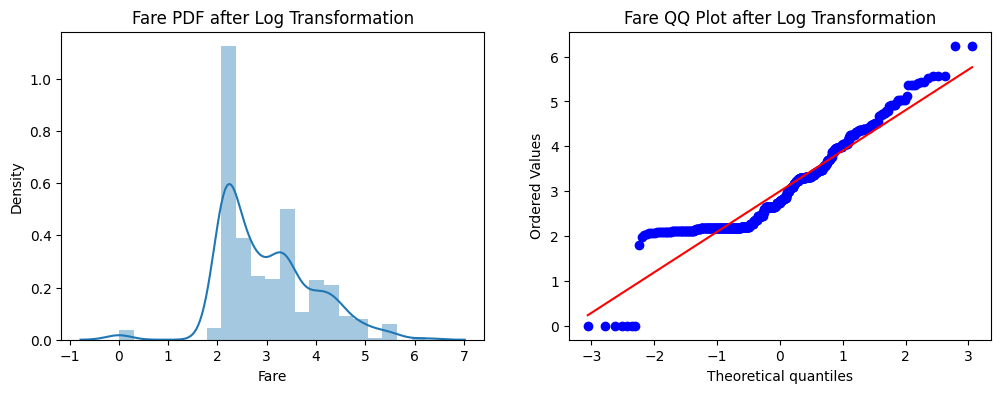

In [22]:
# Plot the distribution of 'Fare' column after applying log transformation
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.distplot(x_train_transformed["Fare"])
plt.title("Fare PDF after Log Transformation")

plt.subplot(122)
stats.probplot(x_train_transformed["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ Plot after Log Transformation")

plt.show()

### **Train a Classifier**

In [23]:
# Train the models with log transformed data
lr_clf2 = LogisticRegression()
dt_clf2 = DecisionTreeClassifier()

# Fit the transformed training data
lr_clf2.fit(x_train_transformed, y_train)
dt_clf2.fit(x_train_transformed, y_train)

# Predict the transformed train data
y_pred_lr = lr_clf2.predict(x_test_transformed)
y_pred_dt = dt_clf2.predict(x_test_transformed)

### **Assess the Accuracy**

In [24]:
# Assess the Accuracy
print("Accuracy Score of LR Model after log transformation:", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score of DT Model after log transformation:", accuracy_score(y_test, y_pred_dt))

Accuracy Score of LR Model after log transformation: 0.6977611940298507
Accuracy Score of DT Model after log transformation: 0.667910447761194


### **Apply Cross Validation**

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# Apply log transformation to 'Age' and 'Fare' columns
x_transformed_2 = log_tranformer.fit_transform(df.drop("Survived", axis=1))

In [27]:
lr_clf3 = LogisticRegression()
dt_clf3 = DecisionTreeClassifier()

print("Accuracy Score of LR after Cross Validation:")
print(np.mean(cross_val_score(lr_clf3, x_transformed_2, df["Survived"], scoring="accuracy", cv=10)))

print("Accuracy Score of DT after Cross Validation:")   
print(np.mean(cross_val_score(dt_clf3, x_transformed_2, df["Survived"], scoring="accuracy", cv=10)))

Accuracy Score of LR after Cross Validation:
0.678027465667915
Accuracy Score of DT after Cross Validation:
0.655505617977528


## **Create a Function to Apply Different Transformation**

In [28]:
from sklearn.compose import ColumnTransformer

In [29]:
def apply_transformation(transformer):
    # Define the training data
    x = df.drop("Survived", axis=1)
    y = df["Survived"]
    
    # Create a function transformer
    transformer = FunctionTransformer(func=transformer)
    
    # Fit the data to the transformer
    x_transformed_fare = transformer.fit_transform(x[["Fare"]])
    
    # Concatenate the columns
    x_transformed = np.concatenate((x[["Age"]], x_transformed_fare), axis=1)
    x_transformed = pd.DataFrame(x_transformed, columns=x.columns)
    
    # Instantiate a logistic regression model
    lr = LogisticRegression()
    
    # Print the accuracy of the model after cross validation
    print("Accuracy Score:")
    print(np.mean(cross_val_score(lr, x_transformed, y, scoring="accuracy", cv=10)))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    stats.probplot(x["Fare"], dist="norm", plot=plt)
    plt.title("Fare QQ Plot Before Transform")
    
    plt.subplot(122)
    stats.probplot(x_transformed["Fare"], dist="norm", plot=plt)
    plt.title("Fare QQ Plot Before Transform")
    
    plt.show()

### **Apply Square Transform to 'Fare' Column**

Accuracy Score:
0.6442446941323345


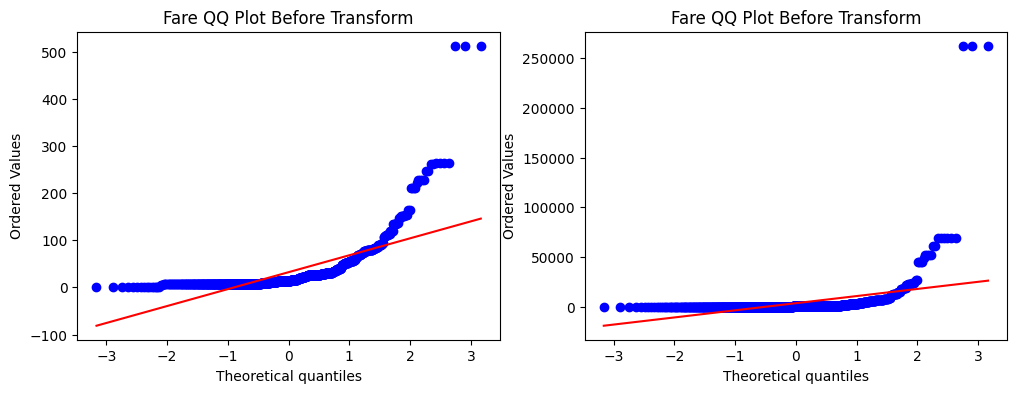

In [30]:
apply_transformation(lambda x:x**2)

### **Apply Reciprocal Transform to 'Fare' Column**

Accuracy Score:
0.61729088639201


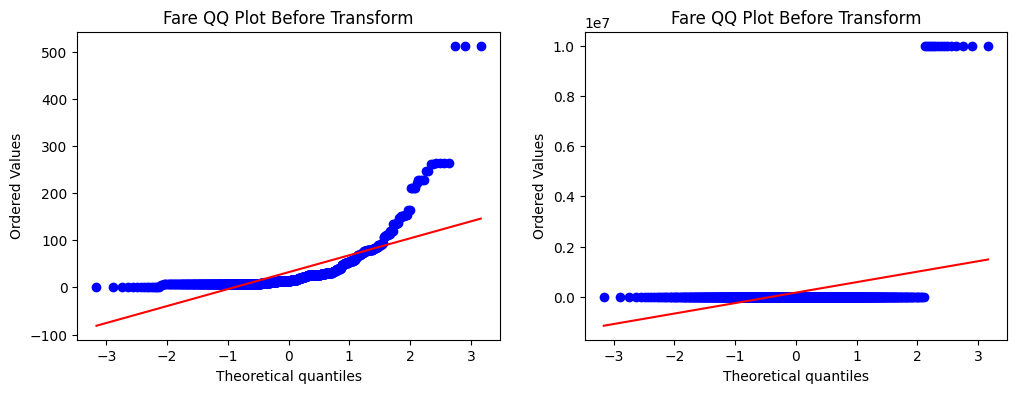

In [31]:
apply_transformation(lambda x: 1/(x+0.0000001))

### **Apply Square Root Transform to 'Fare' Column**

Accuracy Score:
0.6611485642946316


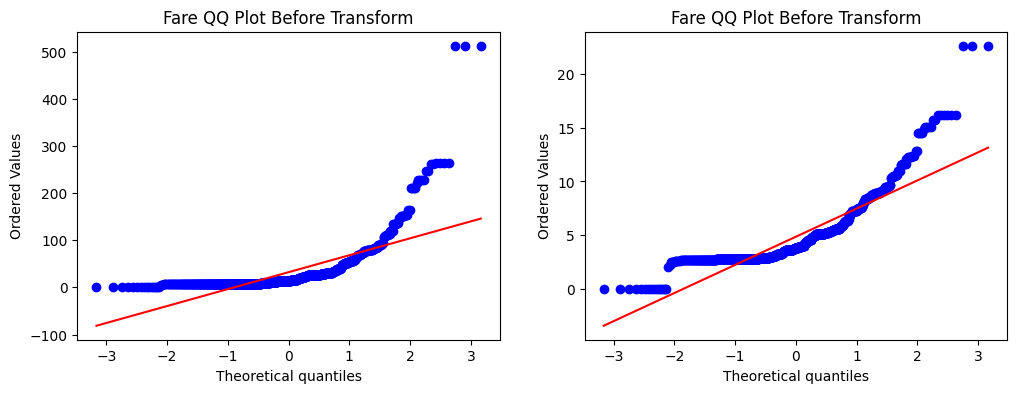

In [32]:
apply_transformation(lambda x: x**0.5)